# Lending Club Case Study


## *Data Cleaning and Manipulation*

## Library Imports

In [4]:
#pip install 'seaborn<=0.13.0' --force-reinstall

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


### Load data from CSV

In [7]:
loan = pd.read_csv('C:\Ranjith\Project\Machine_Learning_AI_upgrad\Lending_Case_Study\loan.csv', low_memory=False)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Find and drop off columns which are of same value throughout the entire rows

In [9]:
same_value_columns = loan.columns[loan.nunique()<=1].tolist()
print(same_value_columns)
null_columns_len=len(same_value_columns)
print('Total number of columns whch are of same value across all rows be it NA,NAN,0,1,INDIVIDUAL : ', null_columns_len)
loan.drop(columns=same_value_columns, inplace=True)
#print(loan)
loan.shape

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd',

(39717, 48)

In [10]:
#Find duplicate rows
duplicates=loan.duplicated()
#Coumnt duplicate rows
total_duplicate_rows=duplicates.sum()
# Display the number of duplicate rows
print("\nNumber of duplicate rows:", total_duplicate_rows)
# Drop duplicate rows if any
loan.drop_duplicates(inplace=True)
loan.shape


Number of duplicate rows: 0


(39717, 48)

#### Find number of rows which has loan status as Current which means the loan installment is still in progress and drop such rows

In [12]:

Current_loan_rows=loan[loan['loan_status']=='Current']
print("\n Number of rows with loan status as Current :",len(Current_loan_rows))
loan.drop(Current_loan_rows.index,inplace=True)

loan.shape


 Number of rows with loan status as Current : 1140


(38577, 48)

In [13]:
# data related to id,member_id,emp_title,issue_d,url,desc,title,zip_code,addr_state dont add value
#print(loan)
remove_columns=['id','member_id', 
                          'emp_title', 'issue_d', 
                          'url', 'desc',
                          'title', 'zip_code', 'addr_state']
removed_columns=list(remove_columns)
#print(removed_columns)
loan.drop(columns=removed_columns,inplace=True)
loan.shape
#print(loan)

(38577, 39)

In [14]:
# Certain column data doesnt add value to data analysis hence can be dropped
remove_columns=['delinq_2yrs', 'earliest_cr_line', 
                          'inq_last_6mths', 'pub_rec', 
                          'revol_bal', 
                          'out_prncp', 'out_prncp_inv', 'total_pymnt', 
                          'total_pymnt_inv', 'total_rec_prncp', 
                          'total_rec_int', 'total_rec_late_fee', 'recoveries', 
                          'collection_recovery_fee', 'last_pymnt_d', 
                          'last_pymnt_amnt', 'last_credit_pull_d','next_pymnt_d','mths_since_last_record'

                          ]
removed_columns=list(remove_columns)
loan.drop(columns=removed_columns,  inplace=True)
loan.shape
#print(loan)

(38577, 20)

In [15]:
loan.columns.tolist()

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'loan_status',
 'purpose',
 'dti',
 'mths_since_last_delinq',
 'open_acc',
 'revol_util',
 'total_acc',
 'pub_rec_bankruptcies']

In [16]:
loan.shape

(38577, 20)

In [17]:
len(loan.columns.tolist())

20

In [18]:
#Dropping columns with majority of rows being the NULL values which doesnt help in Data Analysis
for col in loan.columns:
    missing_values = round(loan[col].isna().sum() / loan.shape[0], 2)
    if missing_values >= 0.50:
        loan.drop(col, axis = 1, inplace = True)
        print("\n Dropping Column since its majority of values are NA :",col)
        
loan.shape


 Dropping Column since its majority of values are NA : mths_since_last_delinq


(38577, 19)

In [19]:
loan.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
dti                        0
open_acc                   0
revol_util                50
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

In [20]:

loan['revol_util'].fillna('100%' , inplace=True)
#loan['revol_util']=loan['revol_util'].fillna('100%', inplace=True)
#loan['revol_util']=loan['revol_util'].replace('0','0.00%')

In [21]:
loan.isna().sum()
#loan['revol_util']

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
dti                        0
open_acc                   0
revol_util                 0
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

In [22]:
# Data Type Conversion
loan = loan.astype({
    'dti': 'float',
    'funded_amnt' : 'float',
    'funded_amnt_inv' : 'float',
    'loan_amnt' : 'float'
})

# Convert term column to int type
loan['term'] = loan['term'].apply(lambda x: int(x.replace('months', '').strip()))

# Convert int_rate column to float type
loan['int_rate'] = loan['int_rate'].apply(lambda x: float(x.replace('%', '').strip()))
loan.isna().sum()
loan['revol_util'] = loan['revol_util'].apply(lambda x: float(x.replace('%', '').strip()))

# Rounding of the values of below columns to two decimal places
for col in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    loan[col] = loan[col].apply(lambda x: round(x, 2))


In [23]:
loan.shape

(38577, 19)

## Data Analysis

1. Outlier Understanding
2. Derived Columns
3. Univariate Analysis (including Segmented Univariate Analysis)
4. Bivariate Analysis


#### Outlier Understanding


(38577, 19)
58868.0
is_annual_inc_lb 4000.0
is_annual_inc_ub 115000.0
(38577, 19)
is_annual_inc_lt 0        True
1        True
2        True
3        True
5        True
         ... 
39712    True
39713    True
39714    True
39715    True
39716    True
Name: annual_inc, Length: 38577, dtype: bool
is_annual_inc_gt 0         True
1         True
2         True
3         True
5         True
         ...  
39712     True
39713     True
39714     True
39715    False
39716     True
Name: annual_inc, Length: 38577, dtype: bool
(34576, 19)


C:\Users\JAYARRA\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


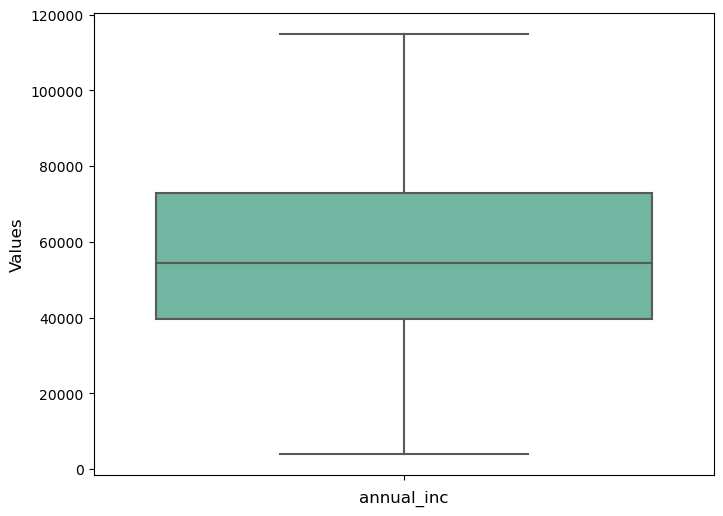

C:\Users\JAYARRA\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


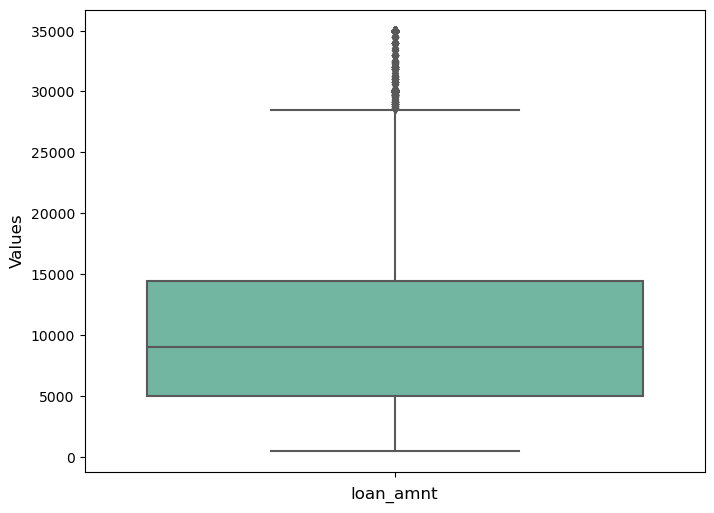

C:\Users\JAYARRA\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


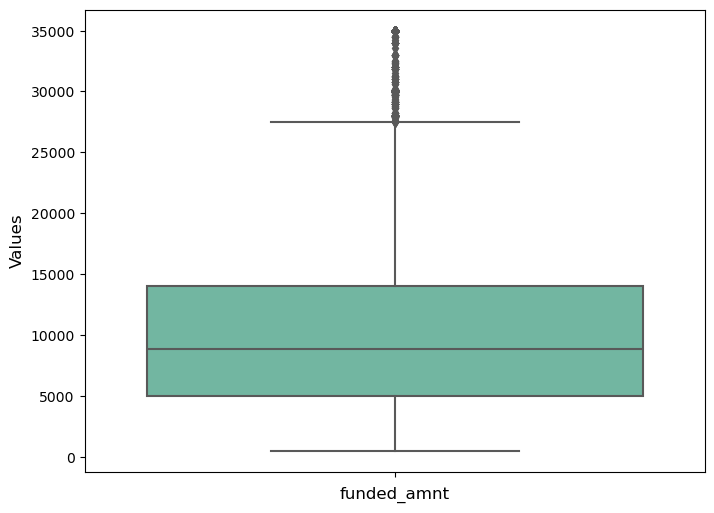

C:\Users\JAYARRA\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


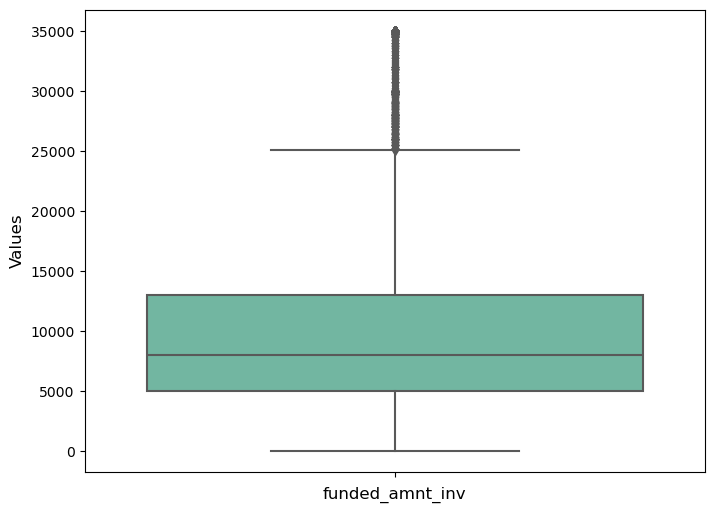

C:\Users\JAYARRA\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


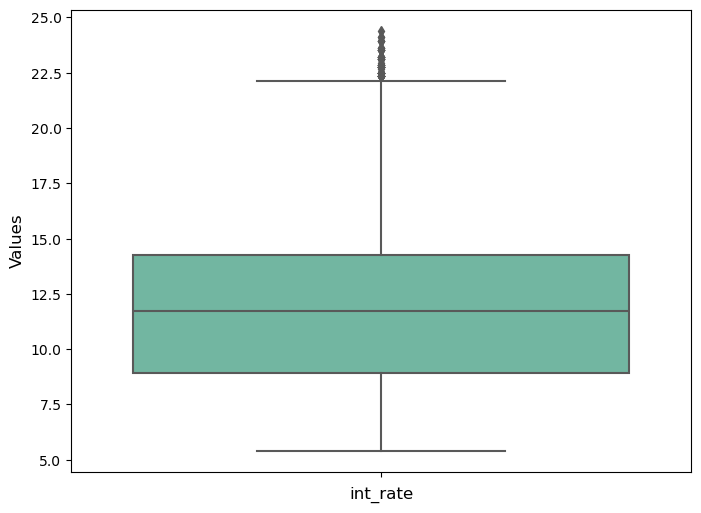

C:\Users\JAYARRA\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


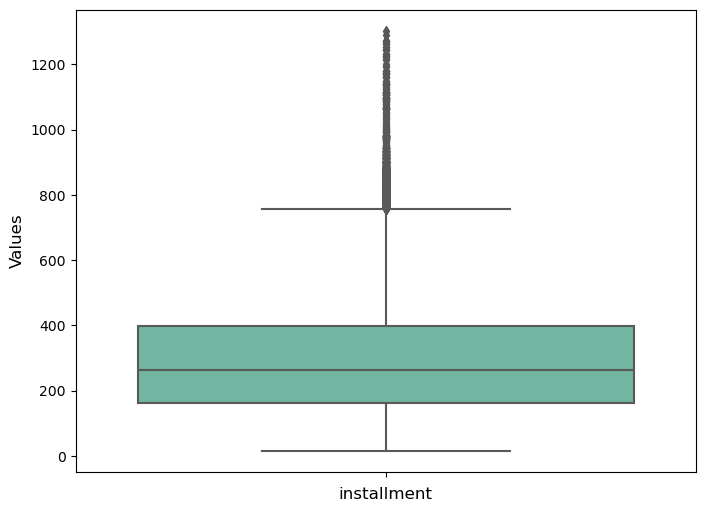

C:\Users\JAYARRA\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


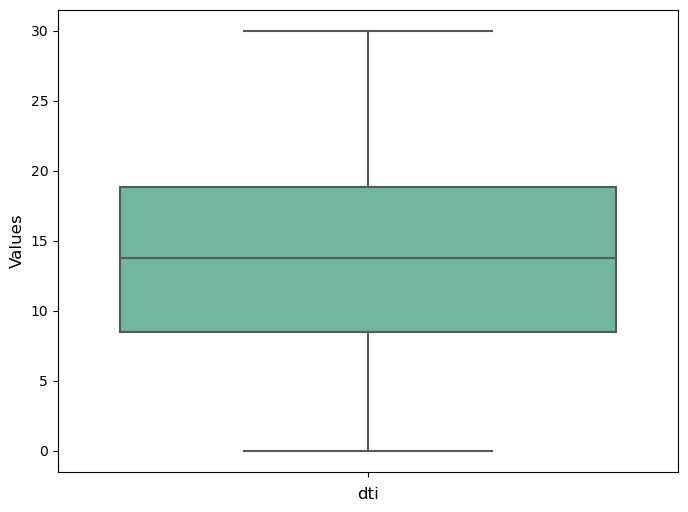

(34576, 19)


In [26]:
def calculate_boxplot_stats(df: pd.DataFrame, column: str, iqr_multiplier: float = 1.5) -> dict:

    quartile1 = df[column].quantile(0.0)
    quartile3 = df[column].quantile(0.9)
    iqr = quartile3 - quartile1
    return quartile1,quartile3

def create_boxplot(df: pd.DataFrame, column_name: str, title: str = None, horizontal: bool = True) -> None:
    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
        return

    plt.figure(figsize=(8, 6))
    if horizontal:
        sb.boxplot(y=df[column_name], orient='h', palette='Set2')
    else:
        sb.boxplot(x=df[column_name], orient='v', palette='Set2')

    if title:
        plt.title(title)

    plt.xlabel(column_name, fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.show()

print(loan.shape)
print(loan['annual_inc'].median())
# Calculate the lower bound and upper bound
is_annual_inc_lb,is_annual_inc_ub = calculate_boxplot_stats(loan, 'annual_inc')

print('is_annual_inc_lb',is_annual_inc_lb)
print('is_annual_inc_ub',is_annual_inc_ub)
is_annual_inc_lt = loan.annual_inc > is_annual_inc_lb
is_annual_inc_gt = loan.annual_inc < is_annual_inc_ub
print(loan.shape)
req_income = is_annual_inc_lt & is_annual_inc_gt
print('is_annual_inc_lt',is_annual_inc_lt)
print('is_annual_inc_gt',is_annual_inc_gt)
# Filter the rows with required annual income range between lower and upper bound
loan = loan[req_income]
print(loan.shape)
for col in ['annual_inc','loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'dti']:
    create_boxplot(loan, col, horizontal=True)
print(loan.shape)

 #### Derived Columns
1. Create new column loan_paid with 'Yes' and 'No' values based on loan_status column where 'Yes' = "Fully Paid" and 'No' = "Charged off"
2. Creating different buckets for loan amount (loan_amount_bucket), interest rate (interest_rate_bucket), annual income (annual_income_bucket)

In [28]:
loan.shape

(34576, 19)

In [29]:
loan_status_map = {'Charged Off': 0, 'Fully Paid': 1 }
loan['loan_paid'] = loan['loan_status'].map(loan_status_map)

In [30]:
loan.shape

(34576, 20)

In [31]:
def bucket_data(column, thresholds, labels) -> str:
    for i, threshold in enumerate(thresholds):
        if column < threshold:
            return labels[i]
    return labels[-1]

In [32]:
# Categorising Loan Amount
loan_amount_thresholds = [5000, 10000, 15000]
loan_amount_labels = ['0 - 5K', '5K - 10K', '10K - 15K', '15K - above']
loan['loan_amnt_bucket'] = loan['loan_amnt'].apply(bucket_data, args=(loan_amount_thresholds, loan_amount_labels))

In [33]:
loan.shape

(34576, 21)

In [34]:
loan[['loan_amnt', 'loan_amnt_bucket']]

,loan_amnt,loan_amnt_bucket
0,5000.0,5K - 10K
1,2500.0,0 - 5K
2,2400.0,0 - 5K
3,10000.0,10K - 15K
5,5000.0,5K - 10K
...,...,...
39711,5000.0,5K - 10K
39712,2500.0,0 - 5K
39713,8500.0,5K - 10K
39714,5000.0,5K - 10K


In [35]:
# Bucketting for int_rate
int_rate_bins = [5, 9, 13, 17, 21]
int_rate_labels = ['0%-5%', '5%-9%','9%-13%','13%-17%','17%-21%','21%-25%']
loan['int_rate_bucket'] = loan['int_rate'].apply(bucket_data, args=((int_rate_bins, int_rate_labels)))

In [36]:
loan[['int_rate', 'int_rate_bucket']]

,int_rate,int_rate_bucket
0,10.65,9%-13%
1,15.27,13%-17%
2,15.96,13%-17%
3,13.49,13%-17%
5,7.90,5%-9%
...,...,...
39711,8.70,5%-9%
39712,8.07,5%-9%
39713,10.28,9%-13%
39714,8.07,5%-9%


In [37]:
loan.shape

(34576, 22)

In [38]:
# Bucketting Annual Income
annual_inc_thresholds = [40000, 50000, 60000, 70000, 80000]
annual_inc_labels = ['0 - 40k', '40k - 50k', '50k - 60k', '60k - 70k', '70k - 80k', '80k - above']
loan['annual_inc_bucket'] = loan['annual_inc'].apply(bucket_data, args=(annual_inc_thresholds, annual_inc_labels))

In [39]:
loan[['annual_inc', 'annual_inc_bucket']]

,annual_inc,annual_inc_bucket
0,24000.0,0 - 40k
1,30000.0,0 - 40k
2,12252.0,0 - 40k
3,49200.0,40k - 50k
5,36000.0,0 - 40k
...,...,...
39711,75000.0,70k - 80k
39712,110000.0,80k - above
39713,18000.0,0 - 40k
39714,100000.0,80k - above


In [40]:
loan.shape

(34576, 23)

In [41]:
# Bucketting Funded Amount
funded_amnt_thresholds = [5000, 10000, 15000]
funded_amnt_labels = ['0 - 5k', '5k - 10k', '10k - 15k', '15k - above']
loan['funded_amnt_bucket'] = loan['funded_amnt'].apply(bucket_data, args=(funded_amnt_thresholds, funded_amnt_labels))

In [42]:
loan[['funded_amnt', 'funded_amnt_bucket']]

,funded_amnt,funded_amnt_bucket
0,5000.0,5k - 10k
1,2500.0,0 - 5k
2,2400.0,0 - 5k
3,10000.0,10k - 15k
5,5000.0,5k - 10k
...,...,...
39711,5000.0,5k - 10k
39712,2500.0,0 - 5k
39713,8500.0,5k - 10k
39714,5000.0,5k - 10k


In [43]:
loan.shape

(34576, 24)

In [44]:
# Bucketting DTI
dti_thresholds = [8, 12, 16, 20]
dti_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
loan['dti_bucket'] = loan['dti'].apply(bucket_data, args=(dti_thresholds, dti_labels))

In [45]:
loan[['dti', 'dti_bucket']]

,dti,dti_bucket
0,27.65,Very High
1,1.00,Very Low
2,8.72,Low
3,20.00,Very High
5,11.20,Low
...,...,...
39711,15.55,Medium
39712,11.33,Low
39713,6.40,Very Low
39714,2.30,Very Low


In [46]:
loan.shape

(34576, 25)

In [47]:
loan.shape

(34576, 25)

In [48]:
#Bucketing revol_util
revol_util_thresholds = [10.00, 30.00, 50.00, 75.00,100.00]
revol_util_labels = ['Excellent 0-10%', 'Good 10-30%', 'Fair 30-50%', 'Poor 50-75%', 'Very Poor 75-100%']
loan['revol_util_bucket'] = loan['revol_util'].apply(bucket_data, args=(revol_util_thresholds, revol_util_labels))
loan[['revol_util', 'revol_util_bucket']]

,revol_util,revol_util_bucket
0,83.7,Very Poor 75-100%
1,9.4,Excellent 0-10%
2,98.5,Very Poor 75-100%
3,21.0,Good 10-30%
5,28.3,Good 10-30%
...,...,...
39711,23.0,Good 10-30%
39712,13.1,Good 10-30%
39713,26.9,Good 10-30%
39714,19.4,Good 10-30%


In [49]:
loan.shape

(34576, 26)

### 3.2 Univariate Analysis

Univariate Analysis

#### 1. Categorical variables
    1. Ordered categorical data
        1. Grade (grade)
        2. Sub grade (sub_grade)
        3. Term (36 / 60 months) (term)
        4. Employment length (emp_length)

    2. Unordered categorical data
        1. Address State (addr_state)
        2. Loan purpose (purpose)
        3. Home Ownership (home_ownership)
        4. Loan status (loan_status)
        5. Loan paid (loan_paid)
    
#### 2. Quantitative variables
    1. Interest rate bucket (int_rate_bucket)
    2. Annual income bucket (annual_inc_bucket)
    3. Loan amount bucket (loan_amnt_bucket)
    4. Funded amount bucket (funded_amnt_bucket)
    5. Debt to Income Ratio (DTI) bucket (dti_bucket)
    6. Monthly Installment (installment)

In [51]:
def plot_bar_graph(dataframe, x_column, y_column=None, hue_column=None, title=None, xlabel=None, ylabel=None, figsize=(10, 6), x_tick_rotation=90, freq_rotation=0, filter_column=None, filter_value=None):

    # Apply the filter if filter_column and filter_value are provided
    if filter_column and filter_value is not None:
        filtered_dataframe = dataframe[dataframe[filter_column] == filter_value]
    else:
        filtered_dataframe = dataframe

    # Set the style
    sb.set(style="whitegrid")

    # Create the bar plot
    plt.figure(figsize=figsize)
    
    if y_column:
        y_data = filtered_dataframe[y_column].value_counts()
        x_data = y_data.index
        sb.barplot(x=x_data, y=y_data.values, hue=hue_column)
    else:
        sb.barplot(data=filtered_dataframe, x=x_column, hue=hue_column)

    # Display frequency on top of the bars with rotation
    if y_column:
        for p in plt.gca().patches:
            plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', rotation=freq_rotation)

    # Set title and labels
    if title:
        plt.title(title, fontsize=14)
    if xlabel:
        plt.xlabel(xlabel, fontsize=12)
    if ylabel:
        plt.ylabel(ylabel, fontsize=12)

    # Rotate x-axis labels
    plt.xticks(rotation=x_tick_rotation)

    # Show the plot
    plt.show()

In [52]:
loan.shape

(34576, 26)

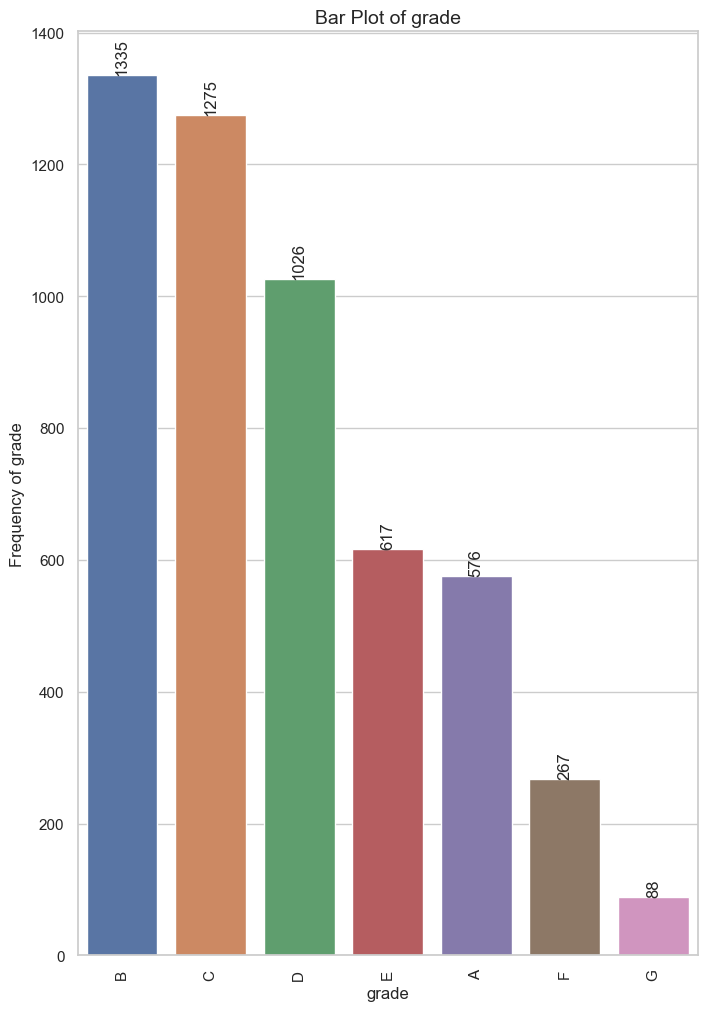

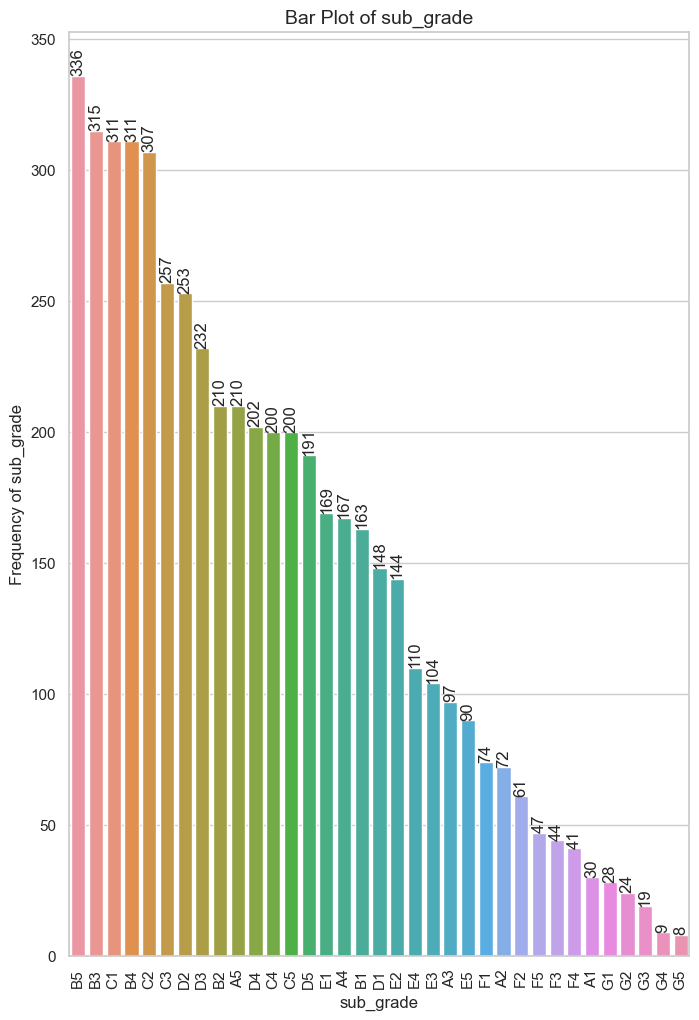

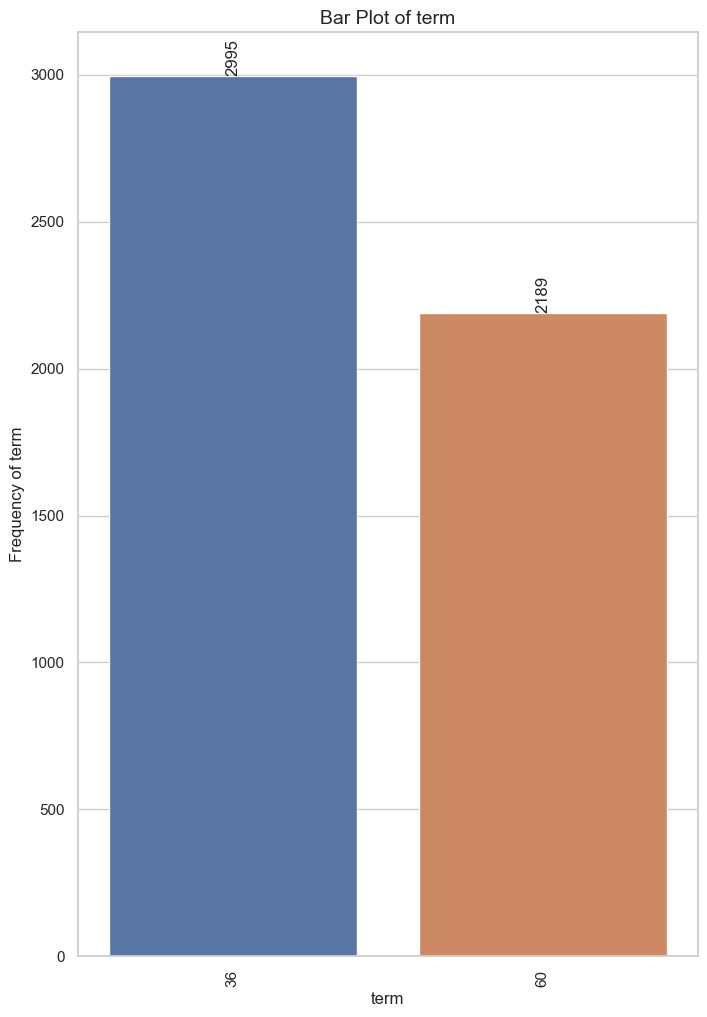

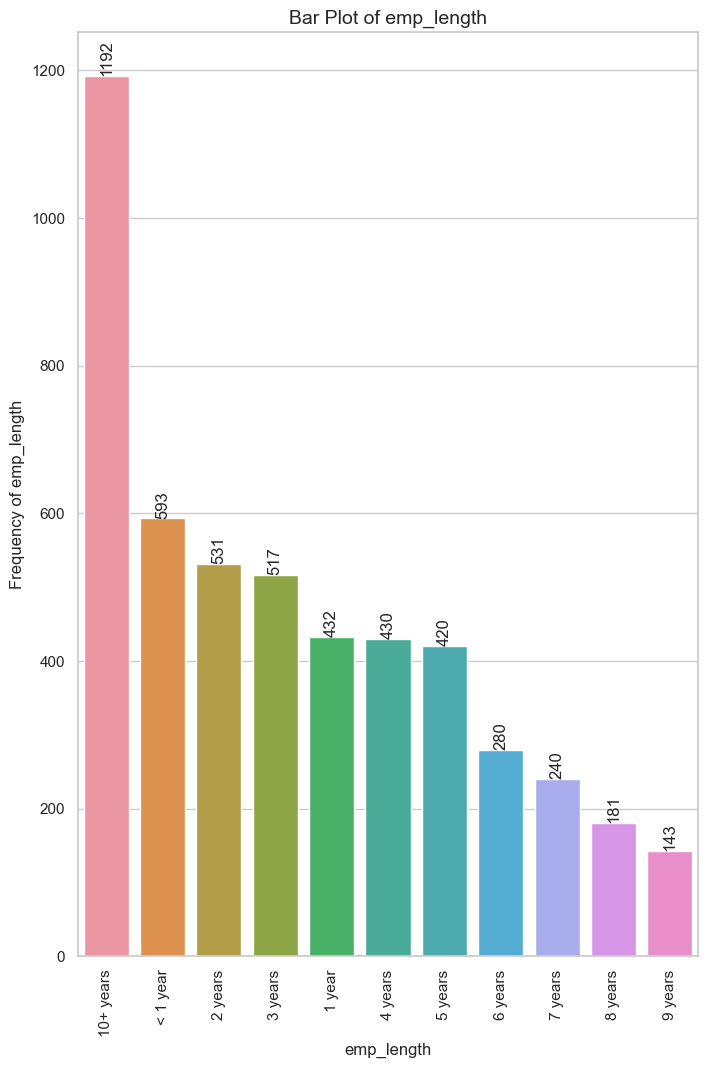

In [53]:

for cat_var in ['grade', 'sub_grade', 'term', 'emp_length']:
    plot_bar_graph(
        loan,
        x_column = cat_var,
        y_column = cat_var,
        title = f'Bar Plot of {cat_var}',
        xlabel = cat_var,
        ylabel=f'Frequency of {cat_var}',
        figsize=(8, 12),
        x_tick_rotation=90,
        freq_rotation=90,
        filter_column='loan_status',
        filter_value='Charged Off'
    )

##### Unordered Categorical Analysis

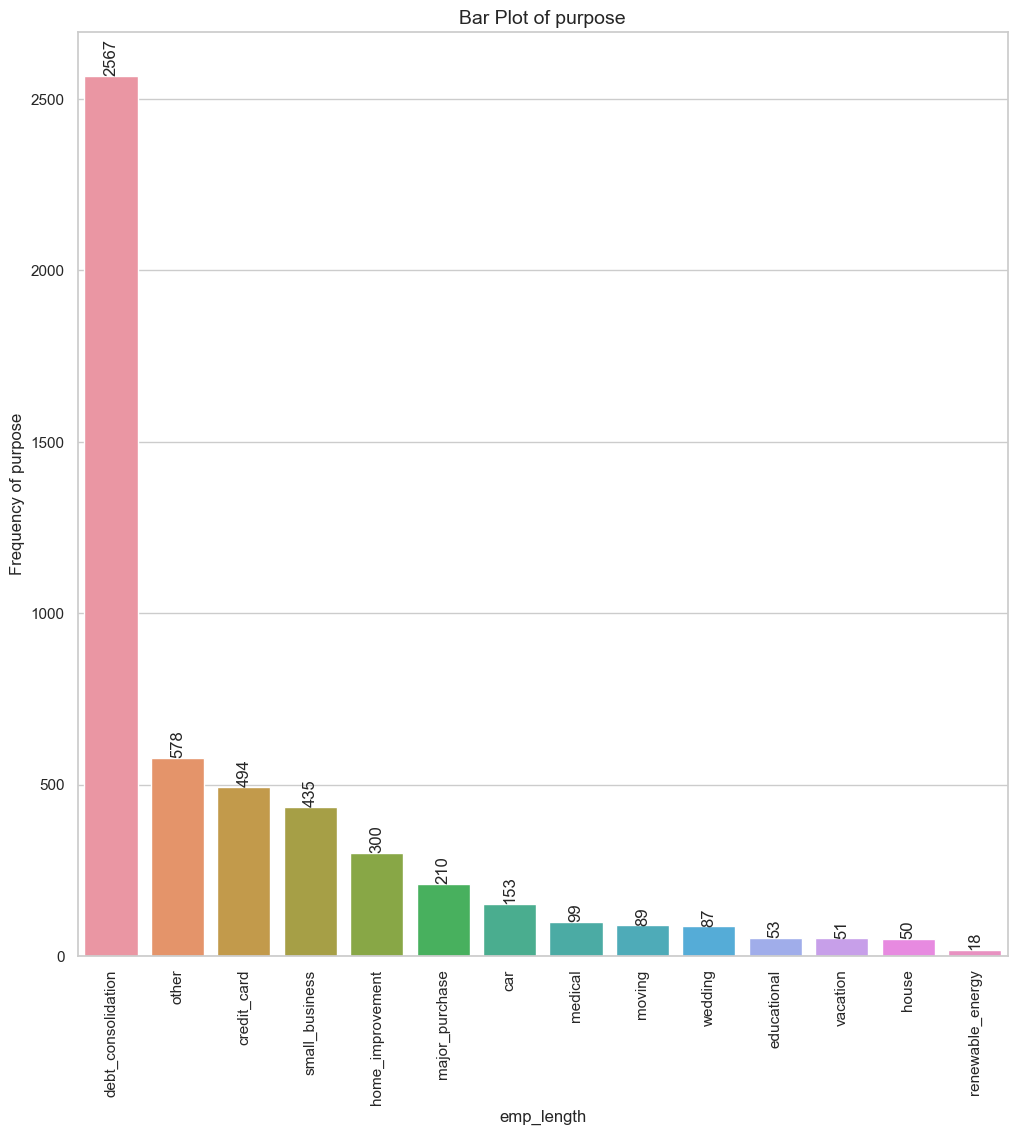

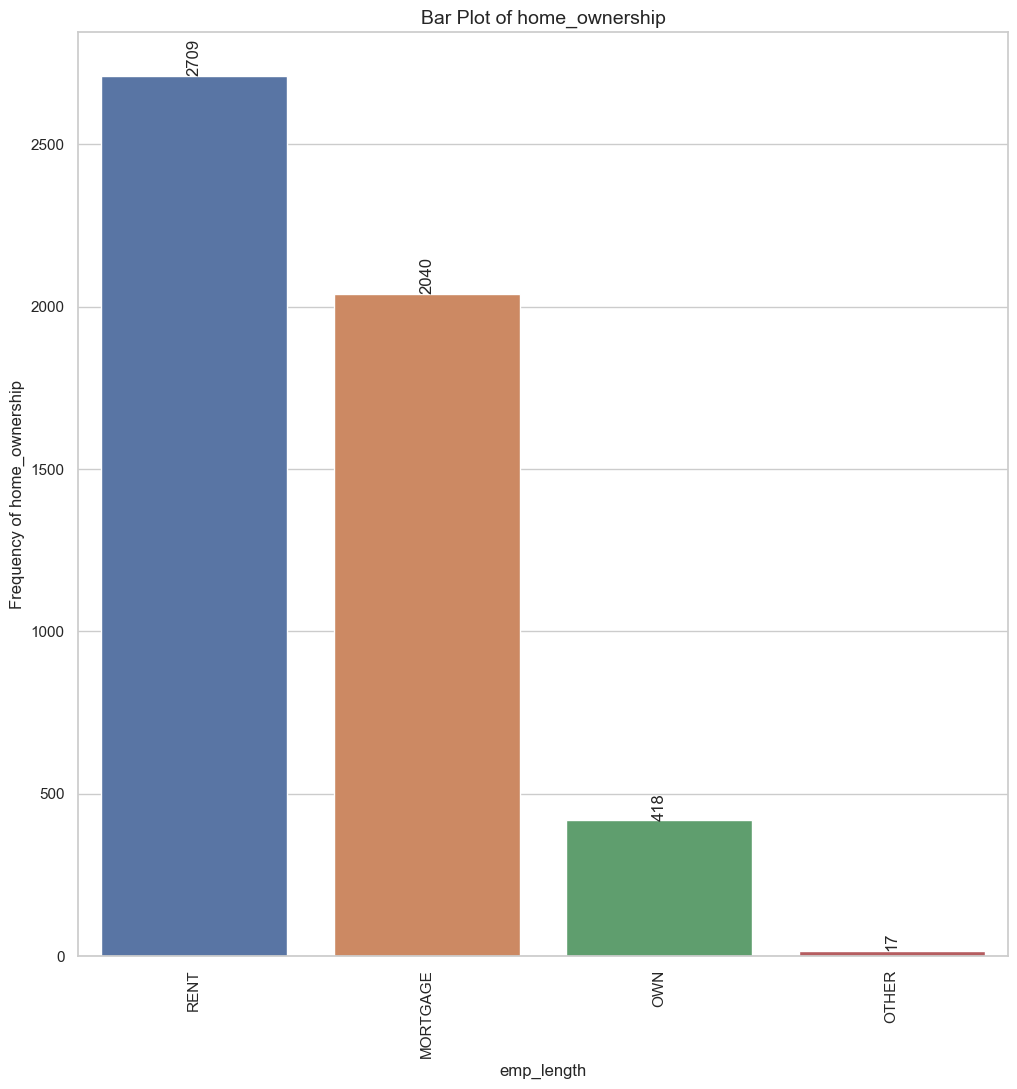

In [55]:
for un_cat_var in ['purpose', 'home_ownership']:
    plot_bar_graph(
        loan,
        x_column = un_cat_var,
        y_column = un_cat_var,
        title = f'Bar Plot of {un_cat_var}',
        xlabel = cat_var,
        ylabel=f'Frequency of {un_cat_var}',
        figsize=(12, 12),
        x_tick_rotation=90,
        freq_rotation=90,
        filter_column='loan_status',
        filter_value='Charged Off'
    )

####  Quantitative variables

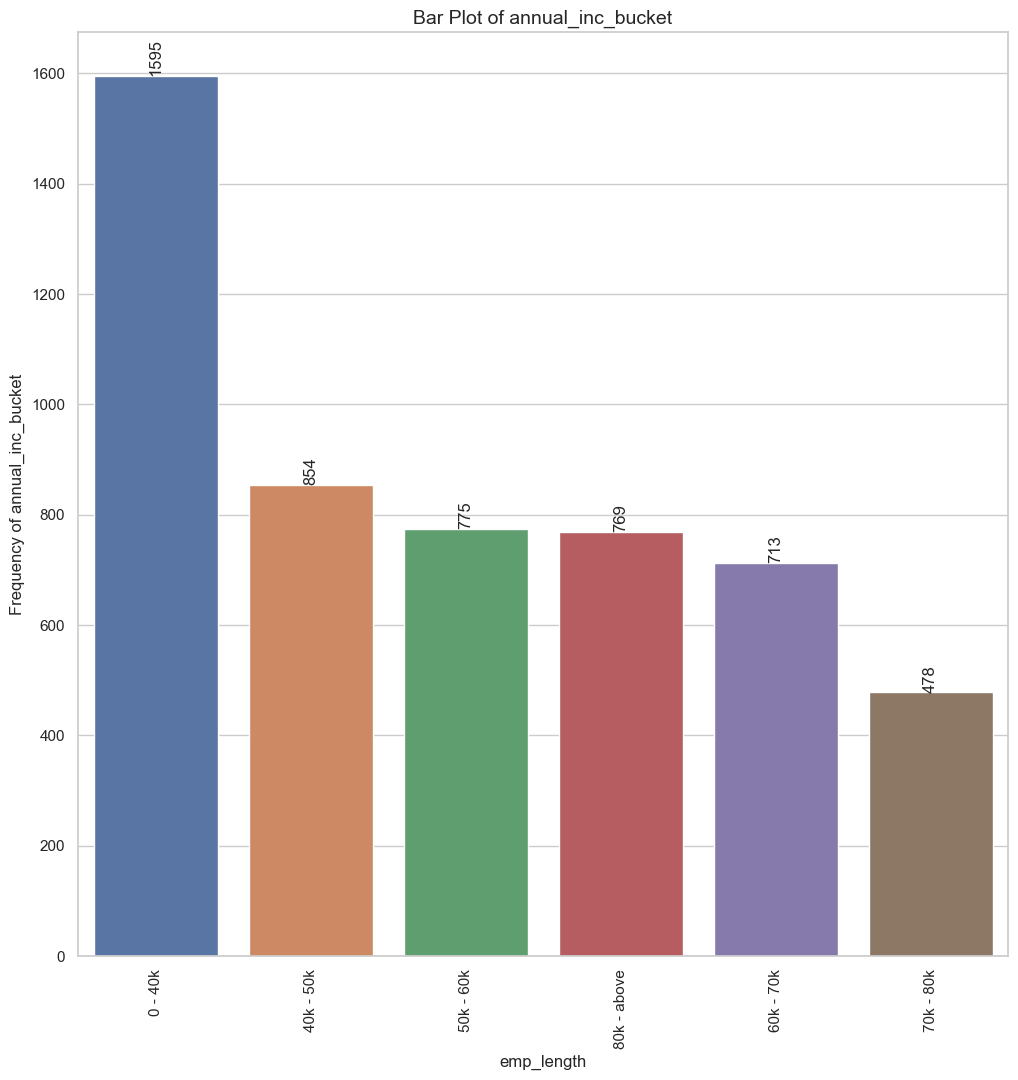

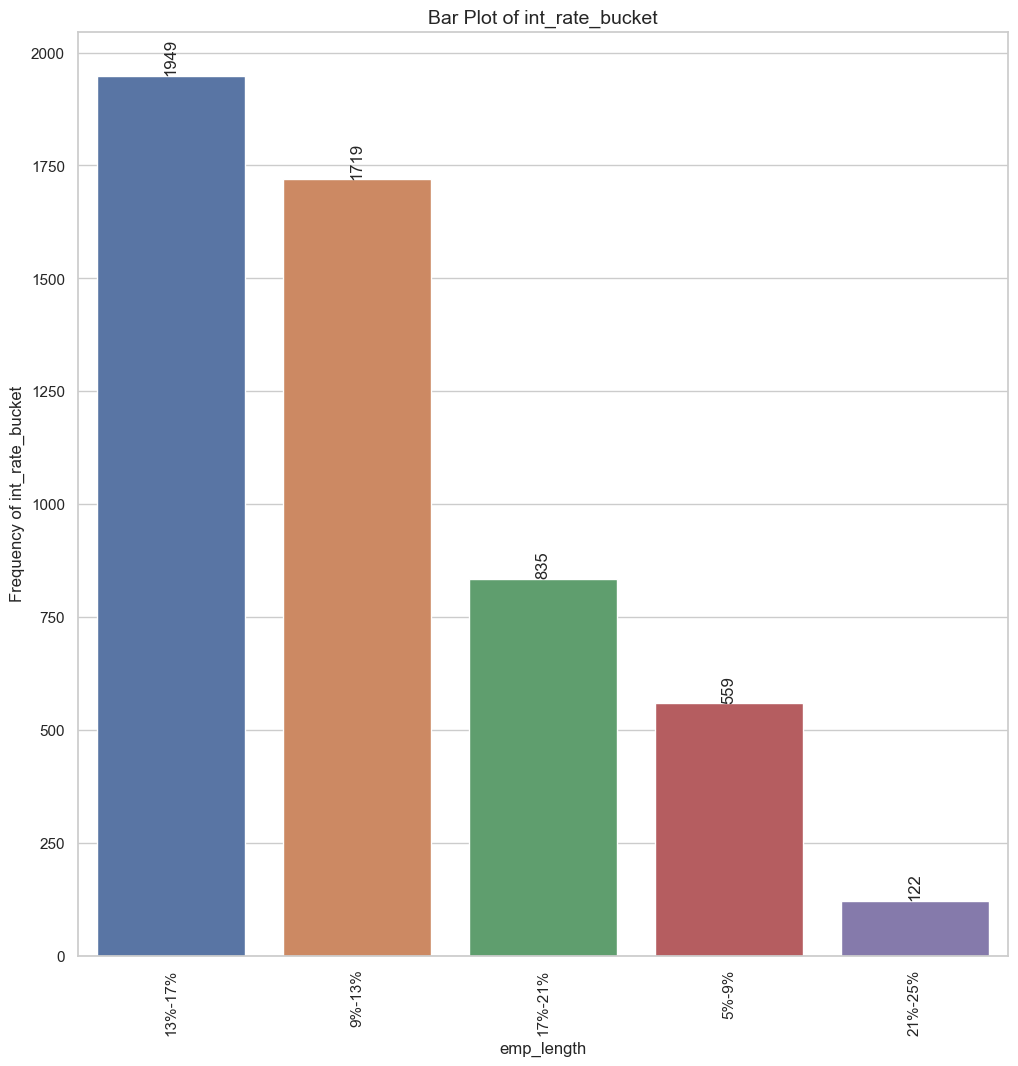

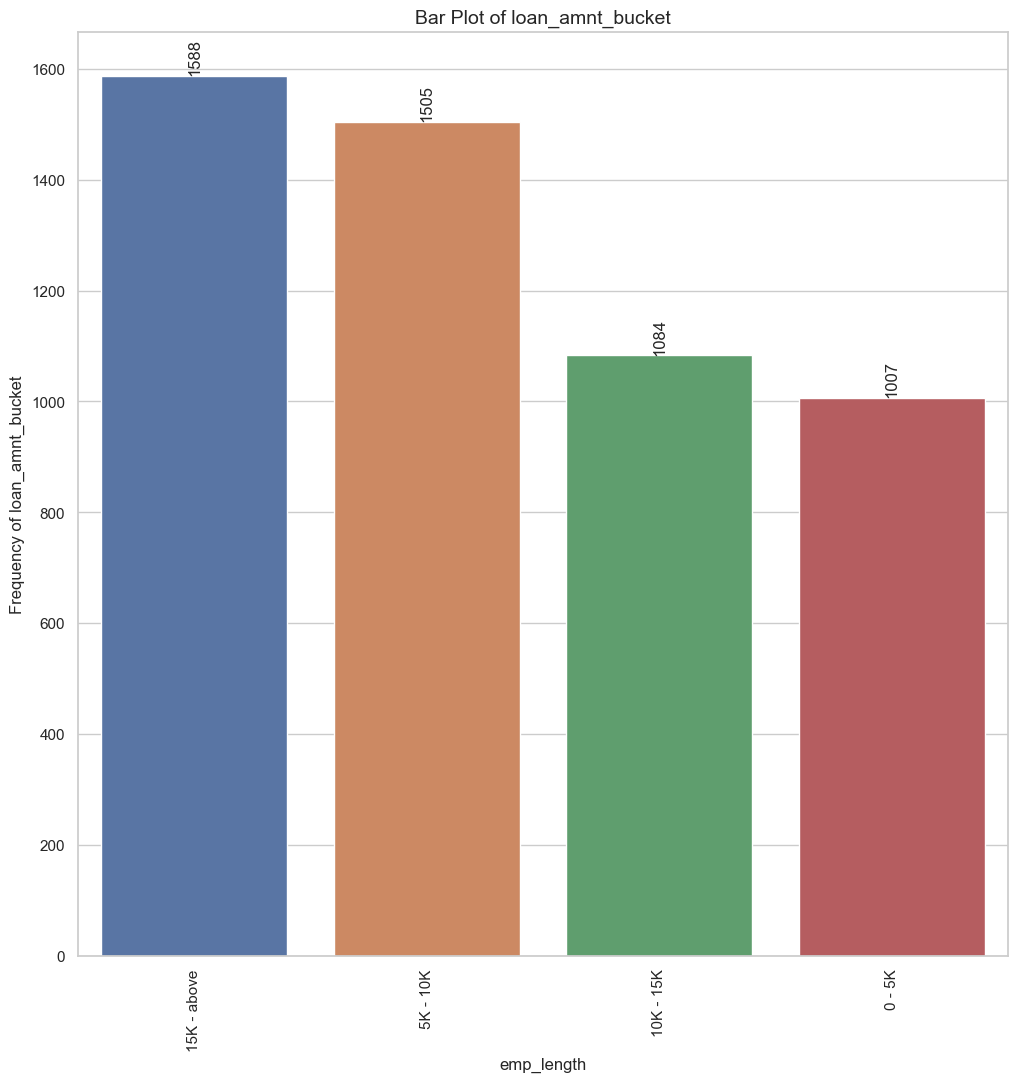

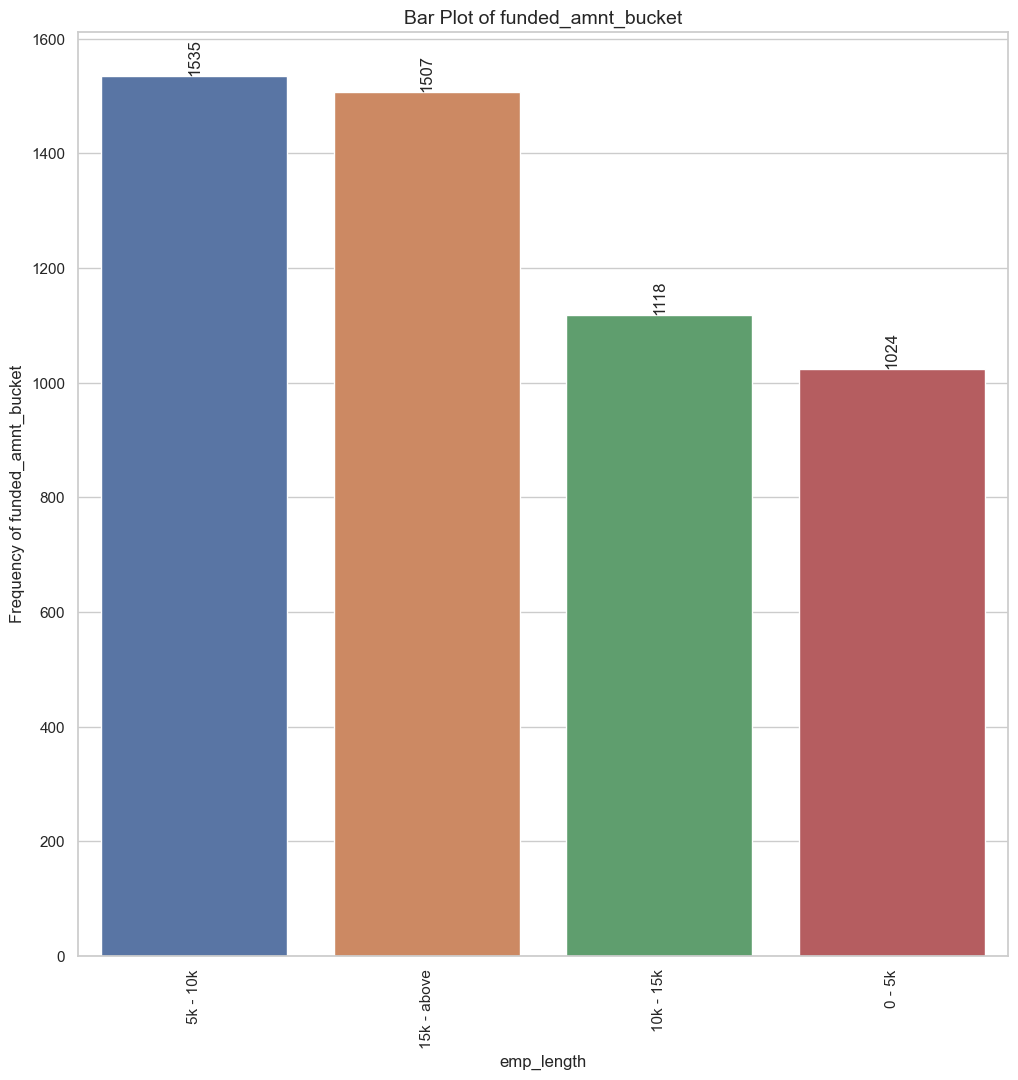

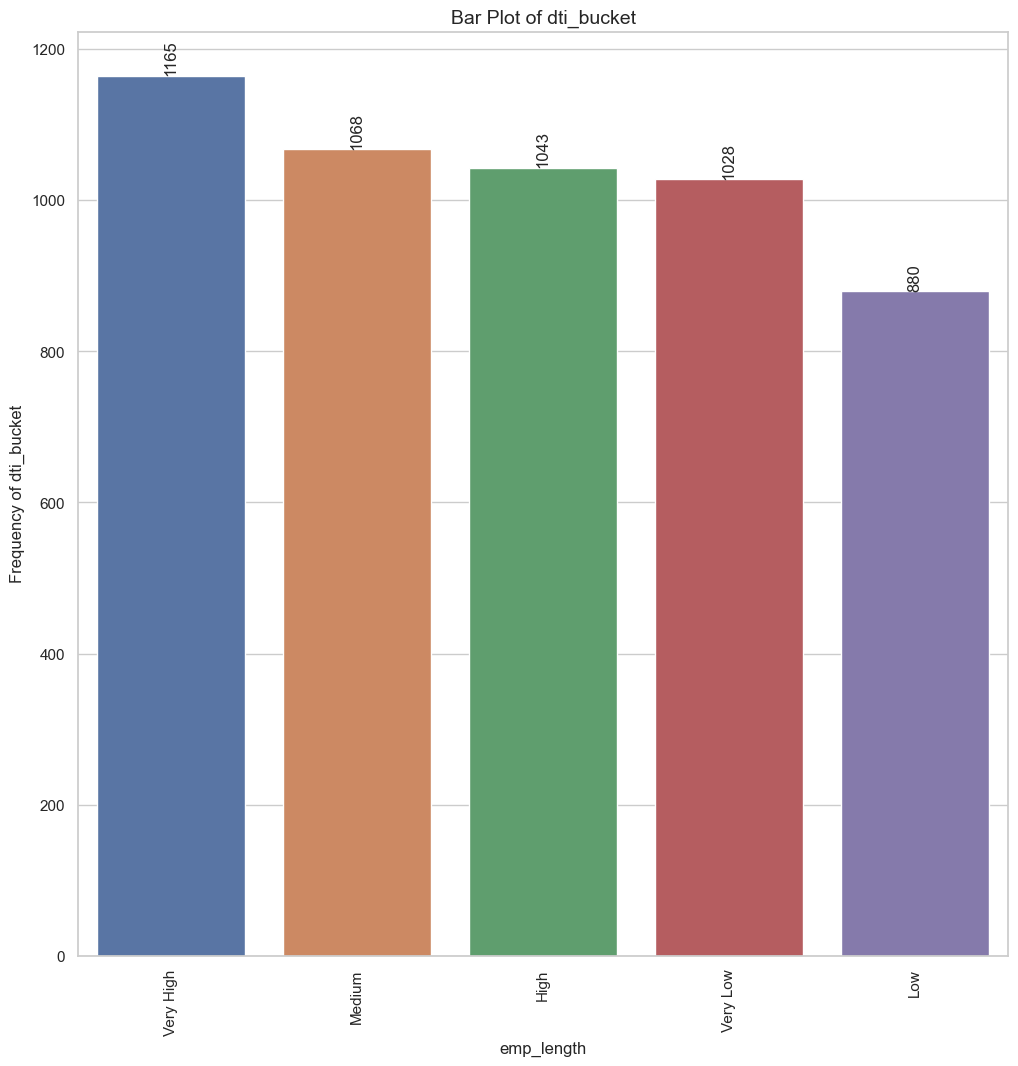

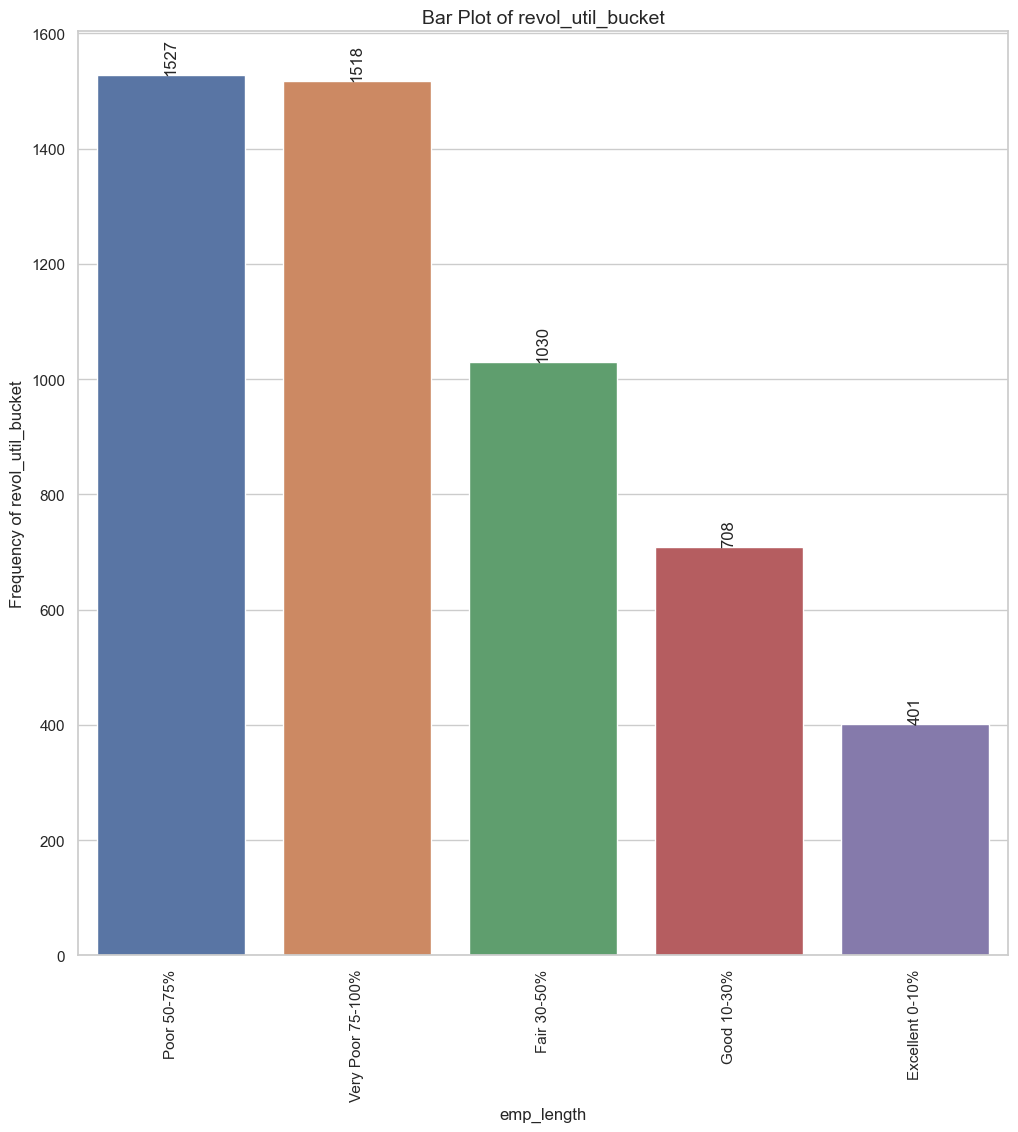

In [57]:
for quant_var in ['annual_inc_bucket', 'int_rate_bucket', 'loan_amnt_bucket', 'funded_amnt_bucket', 'dti_bucket','revol_util_bucket']:
    plot_bar_graph(
        loan,
        x_column = quant_var,
        y_column = quant_var,
        title = f'Bar Plot of {quant_var}',
        xlabel = cat_var,
        ylabel=f'Frequency of {quant_var}',
        figsize=(12, 12),
        x_tick_rotation=90,
        freq_rotation=90,
        filter_column='loan_status',
        filter_value='Charged Off'
    )

###  Bivariate Analysis

Bivariate analysis of below variables against Loan Status 

#### 1. Categorical variables
    1. Ordered categorical data
        1. Grade (grade)
        2. Sub grade (sub_grade)
        3. Term (36 / 60 months) (term)
        4. Employment length (emp_length)

    2. Unordered categorical data
        1. Loan purpose (purpose)
        2. Home Ownership (home_ownership)
        3. Verification Status (verification_status)
        4. Address State (addr_state)
        
#### 2. Quantitative variables
    1. Int Rate Bucket (int_rate_bucket)
    2. Debt to Income Bucket (dti_bucket)
    3. Annual Income Bucket (annual_inc_bucket)
    4. Funded Amount Bucket (funded_amnt_bucket)
    5. Loan Amount Bucket (loan_amnt_bucket)
    6. Revolving Line Utilization rate(revol_util_bucket)


In [59]:
def countplot_graph(data_dict: dict, annot=True) -> None:
    df = data_dict['data']
    x = data_dict['x']
    figsize = data_dict['figsize']
    hue = data_dict.get('hue')
    order = data_dict.get('order')
    x_tick_rotation = data_dict.get('x_tick_rotation')
    xlabel = data_dict.get('xlabel')
    ylabel = data_dict.get('ylabel')
    title = data_dict.get('title')
    palette = data_dict.get('palette')

    fig, ax = plt.subplots(figsize=figsize, dpi=100)

    sb.countplot(x=x, hue=hue, data=df, order=order, palette=palette)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    if annot:
        for p in ax.patches:
            ax.annotate('{:1}'.format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 10))

    ax.set_title(title)
    
    if x_tick_rotation:
        plt.xticks(rotation=x_tick_rotation)

    plt.show()



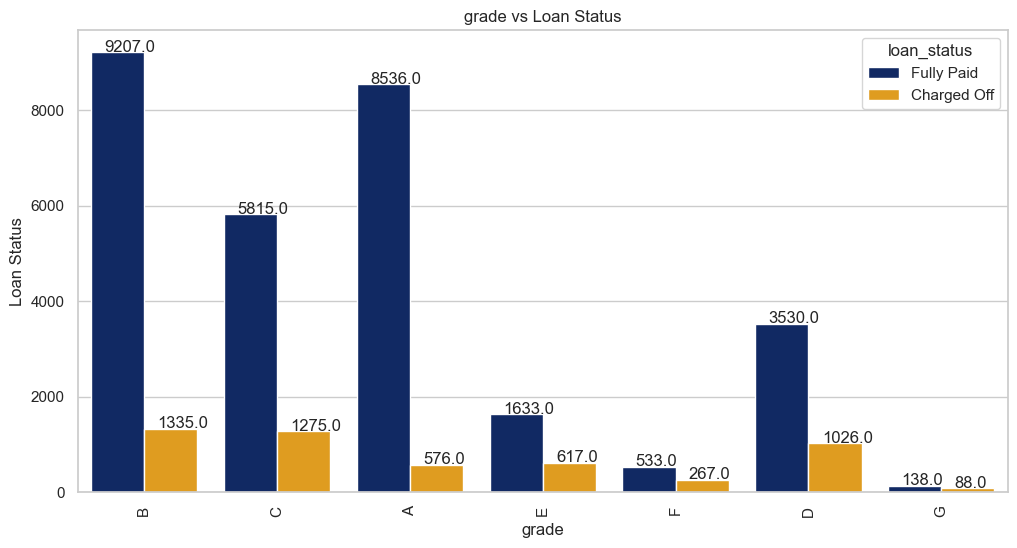

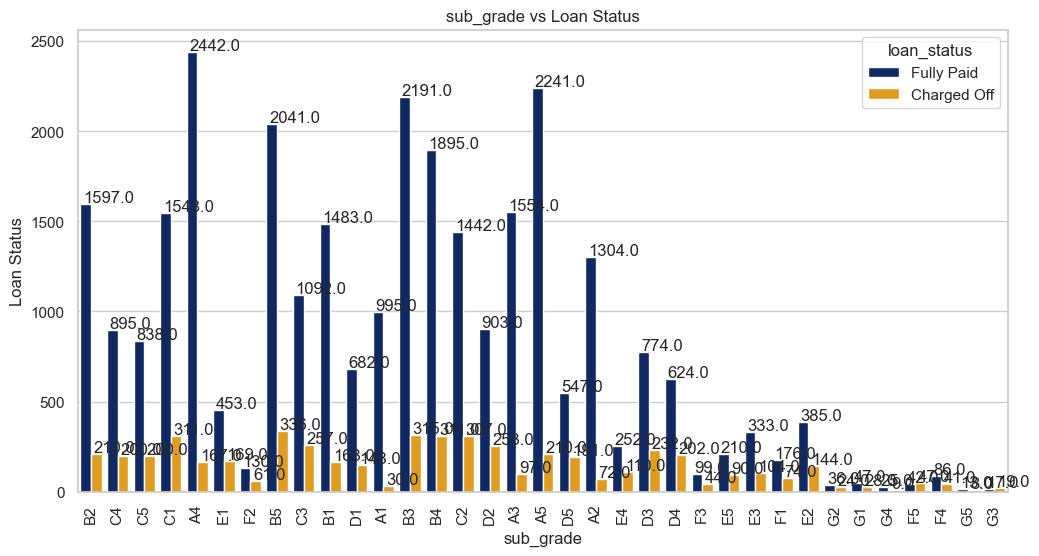

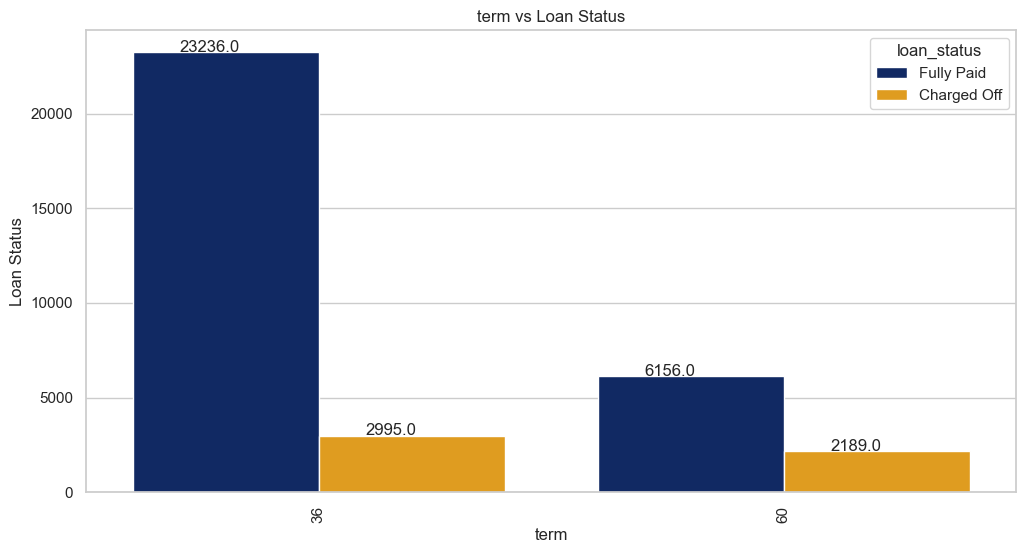

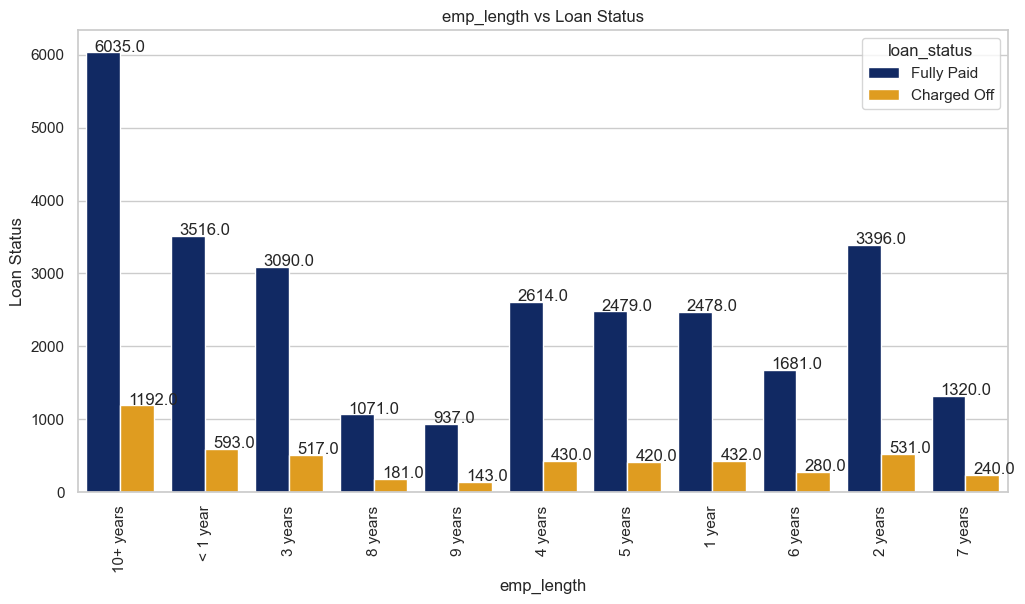

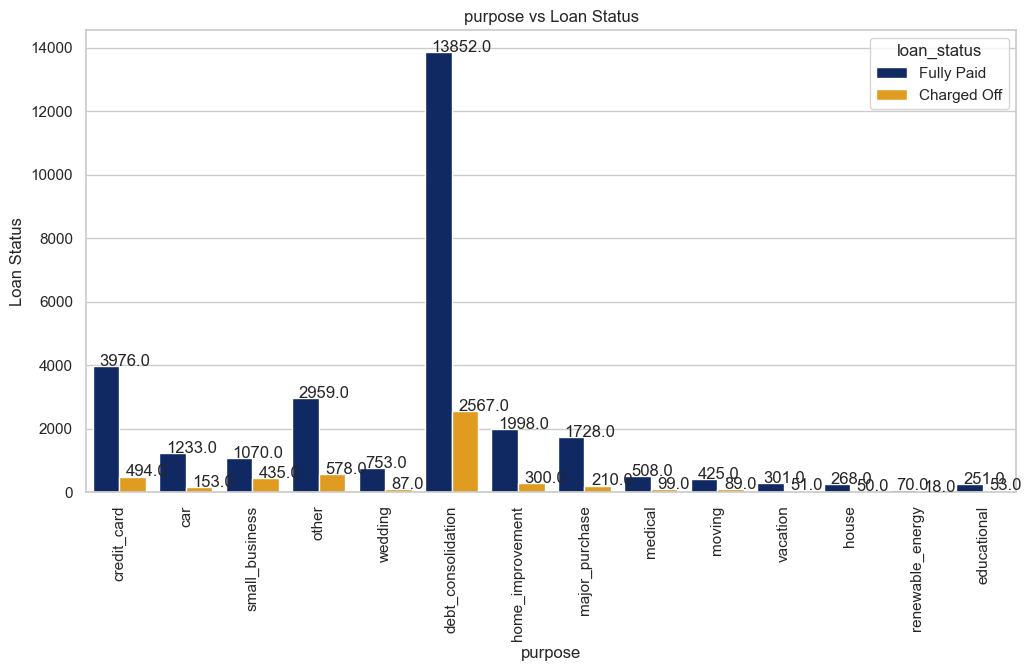

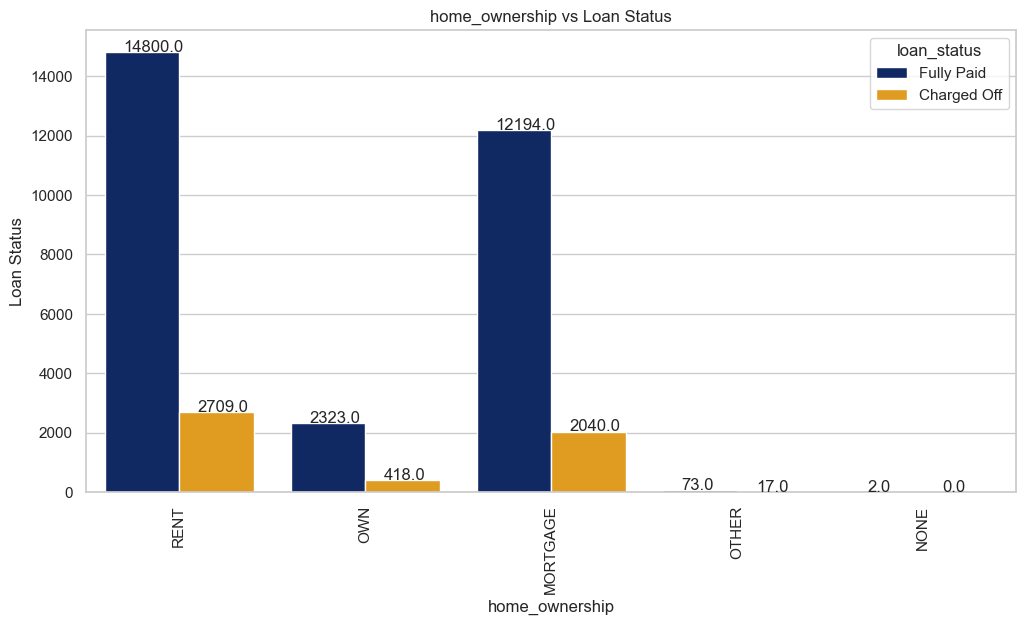

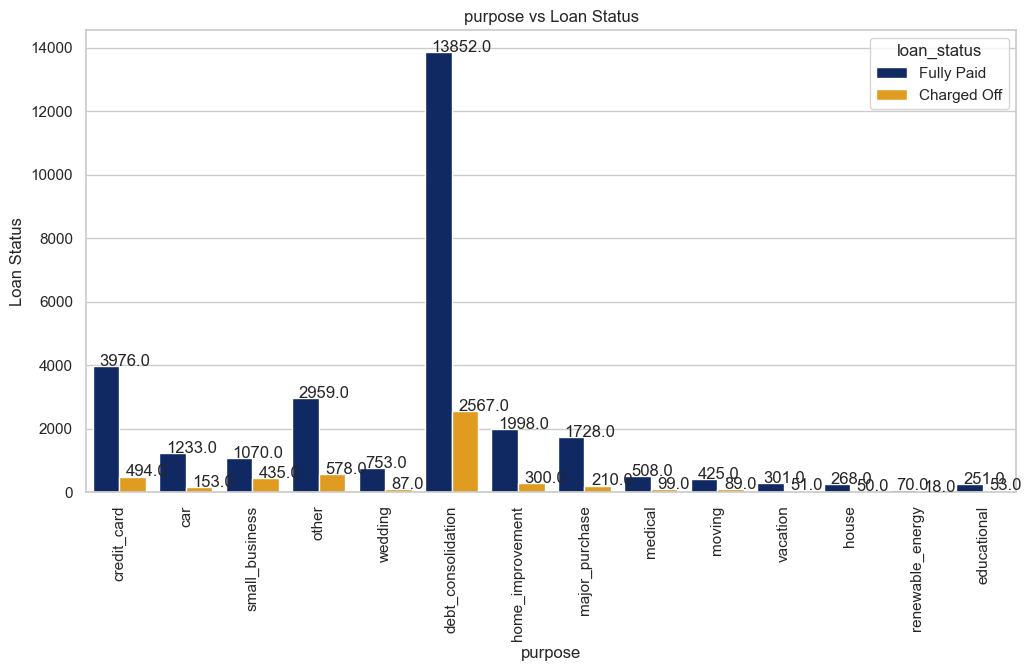

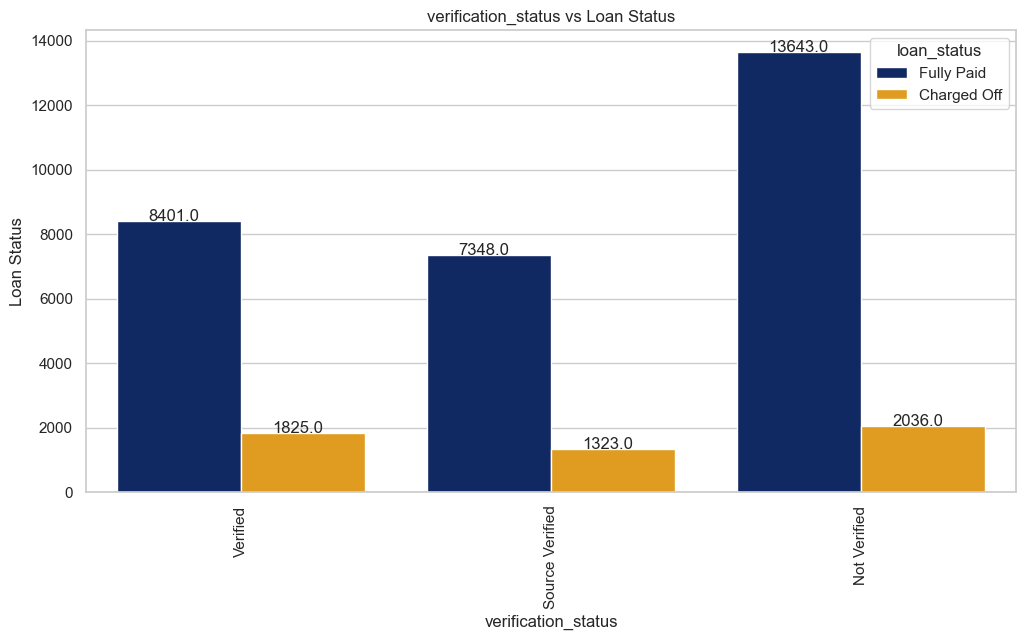

In [60]:
#Grade vs Loan Status
for col in ['grade','sub_grade','term','emp_length','purpose','home_ownership','purpose','verification_status']:
    countplot_graph({
        'data': loan,
        'x': col,
        'figsize': (12, 6),
        'hue': 'loan_status',
        'xlabel': col,
        'ylabel': 'Loan Status',
        'title': f'{col} vs Loan Status',
        'palette':['#032371','Orange'],
        'x_tick_rotation': 90
})

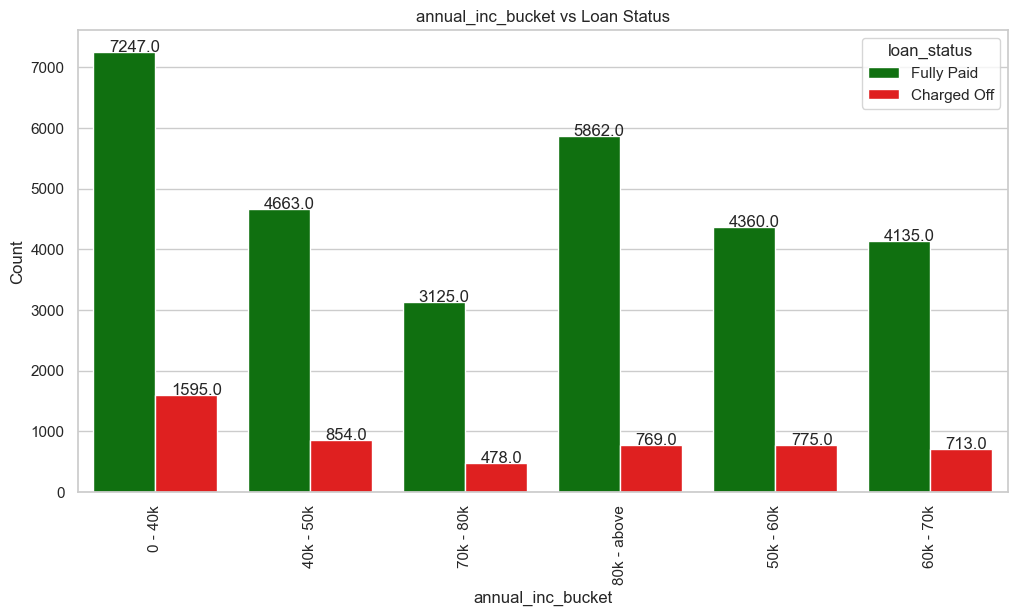

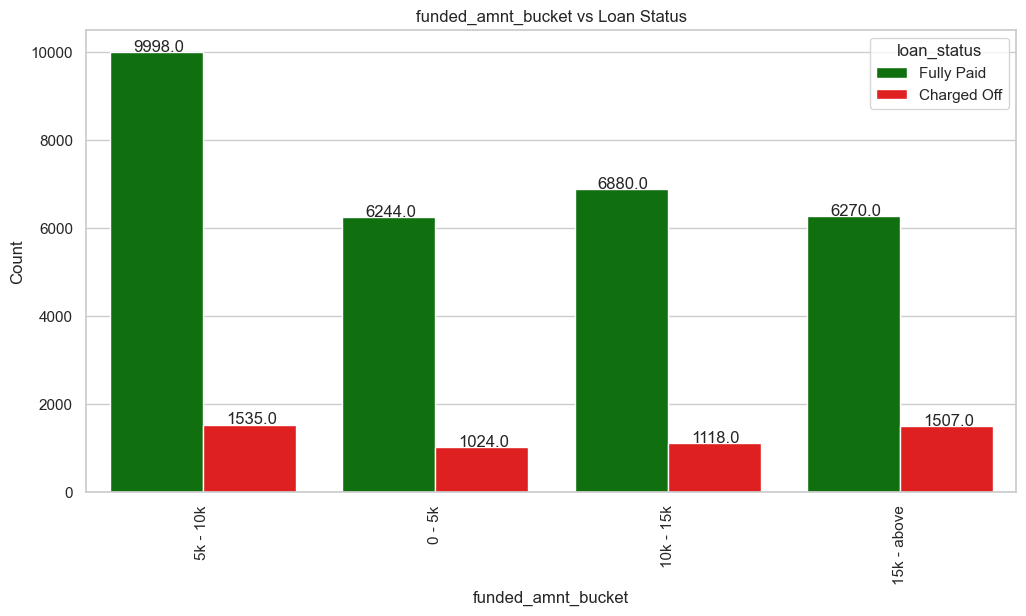

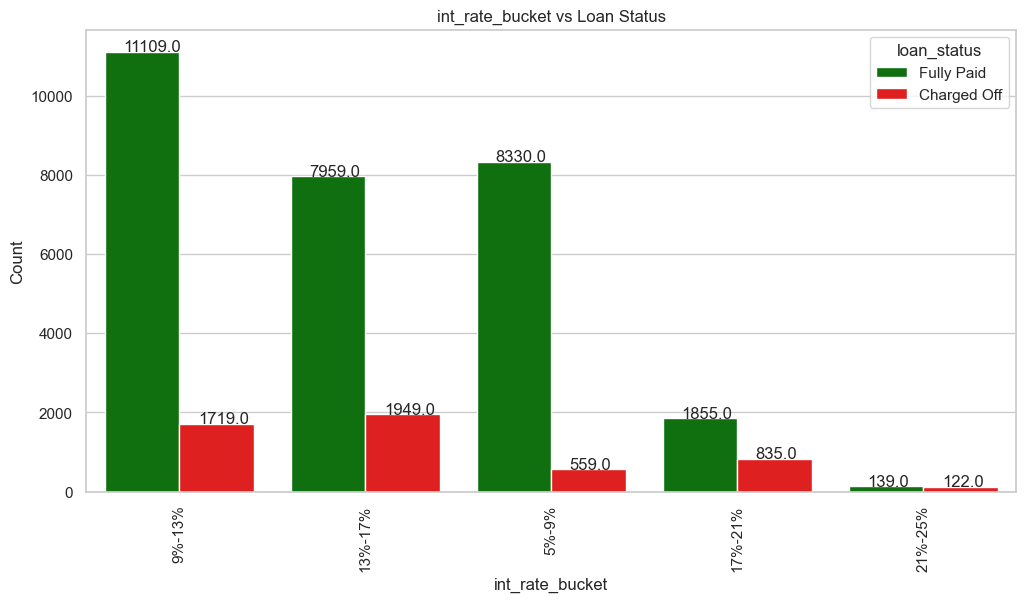

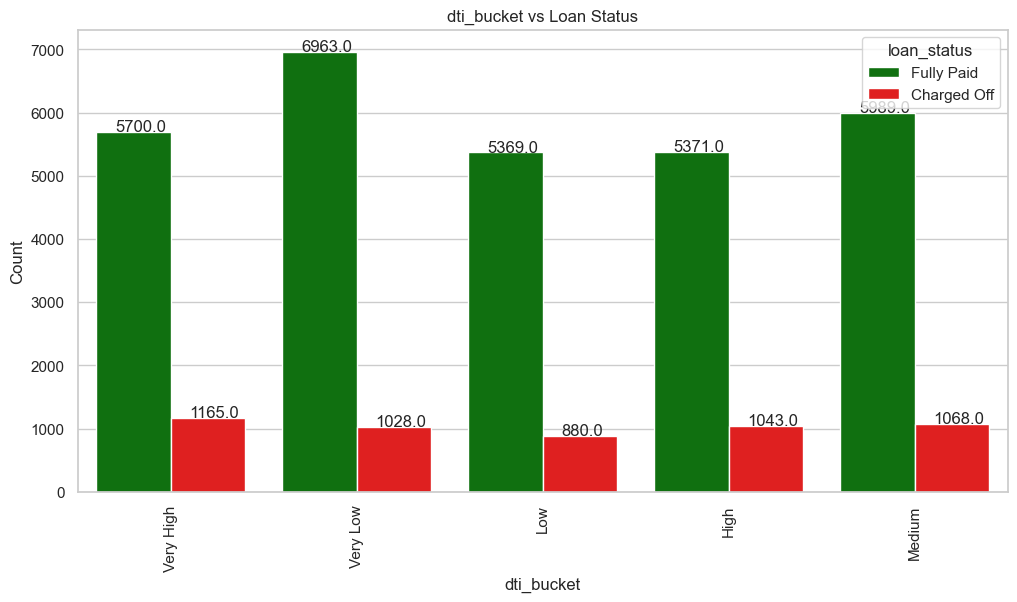

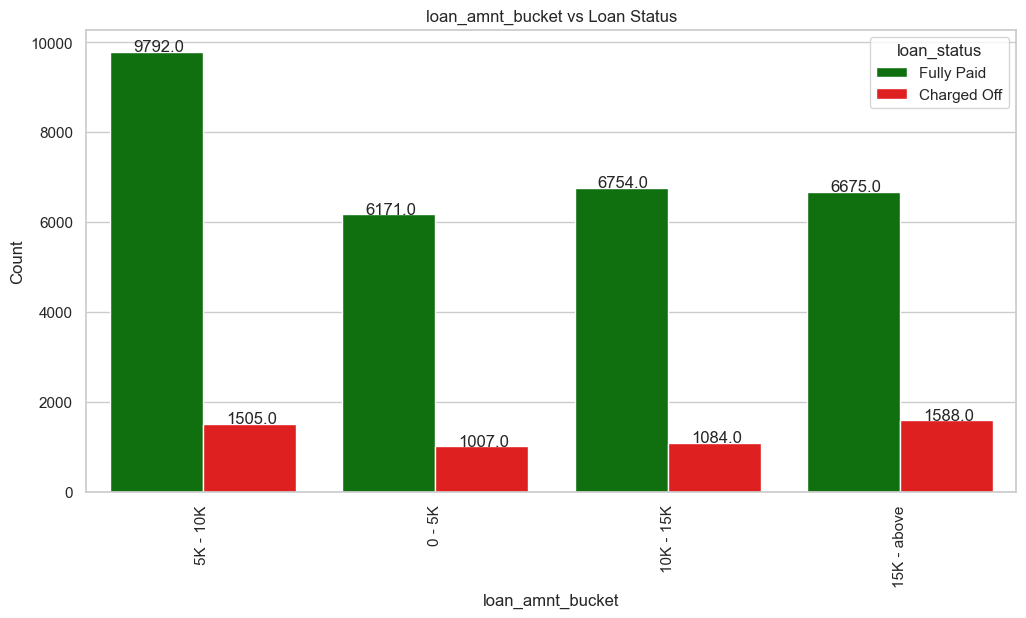

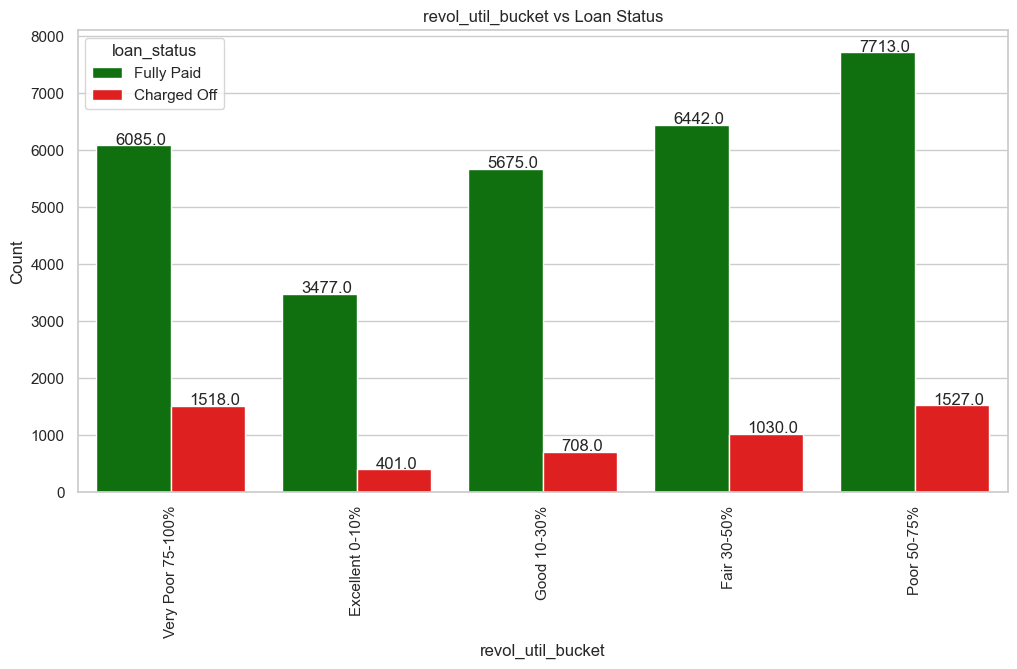

In [61]:
for col in ['annual_inc_bucket', 'funded_amnt_bucket', 'int_rate_bucket', 'dti_bucket', 'loan_amnt_bucket','revol_util_bucket']:
    countplot_graph({
    'data': loan,
    'x': col,
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': col,
    'ylabel': 'Count',
    'title': f'{col} vs Loan Status',
    'palette': ["Green","Red"],
    'x_tick_rotation': 90
}, annot=True)

### Correlation Analysis

In [63]:
loan.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1000
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
dti                        0
open_acc                   0
revol_util                 0
total_acc                  0
pub_rec_bankruptcies     624
loan_paid                  0
loan_amnt_bucket           0
int_rate_bucket            0
annual_inc_bucket          0
funded_amnt_bucket         0
dti_bucket                 0
revol_util_bucket          0
dtype: int64

In [64]:
correlation_df=[]
correlation_df = loan[['loan_paid','loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','annual_inc','dti']]
# Dropping columns which are irrelevant to analysis
#correlation_df = loan_df.drop(['issue_y', 'issue_m','addr_state','grade'], axis = 1)
#for cor in ['loan_paid','loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','annual_inc','dti']:
    #correlation_df[cor]=correlation_df[cor]*100/correlation_df[cor].max()
#print(correlation_df['loan_amnt'])

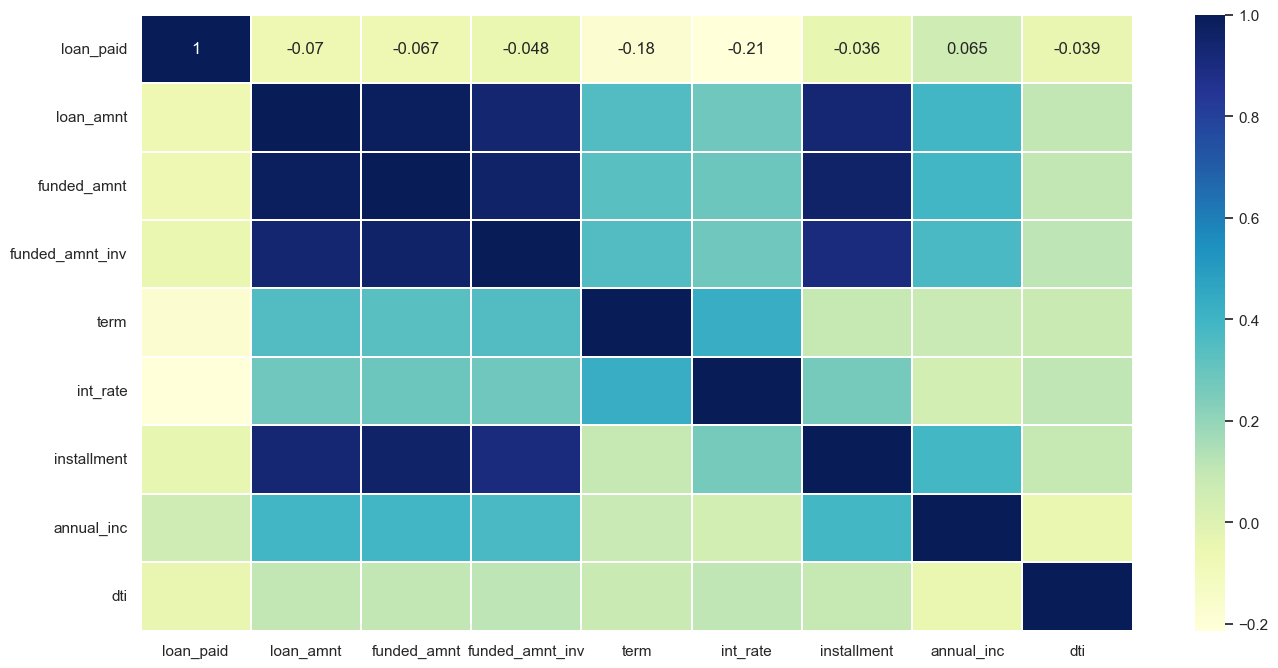

                 loan_paid  loan_amnt  funded_amnt  funded_amnt_inv      term  \
loan_paid         1.000000  -0.069937    -0.067180        -0.047523 -0.177554   
loan_amnt        -0.069937   1.000000     0.982184         0.936284  0.351884   
funded_amnt      -0.067180   0.982184     1.000000         0.954110  0.332702   
funded_amnt_inv  -0.047523   0.936284     0.954110         1.000000  0.353016   
term             -0.177554   0.351884     0.332702         0.353016  1.000000   
int_rate         -0.213453   0.282230     0.288279         0.281849  0.430974   
installment      -0.035701   0.931422     0.956517         0.900828  0.094000   
annual_inc        0.065471   0.392833     0.389624         0.372486  0.084175   
dti              -0.038995   0.103711     0.102903         0.110342  0.078698   

                 int_rate  installment  annual_inc       dti  
loan_paid       -0.213453    -0.035701    0.065471 -0.038995  
loan_amnt        0.282230     0.931422    0.392833  0.103711  


In [65]:
corr = correlation_df.corr()
sb.set(font_scale=1)
plt.figure(figsize=(16, 8))

sb.heatmap(corr, cmap="YlGnBu", annot=True,linewidths = .3) 



#heatmap = sb.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
#heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
#plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print(corr)